In [62]:
from PIL import Image, ImageFilter


import numpy as np

ModuleNotFoundError: No module named 'cv2'

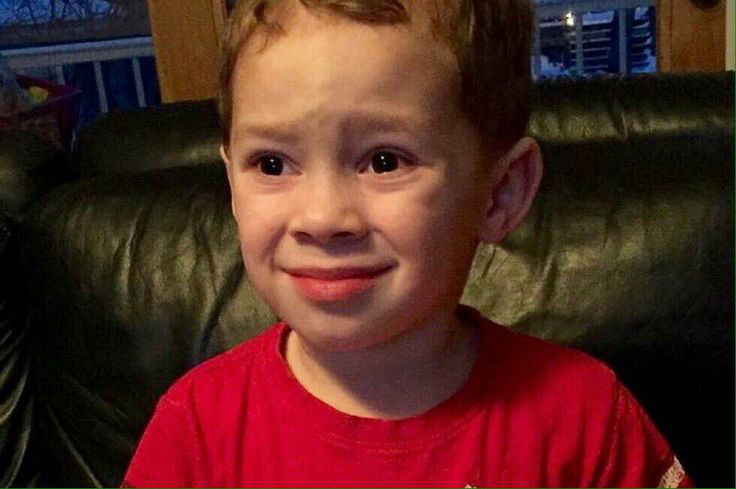

In [48]:
my_pic = Image.open("me.jpg")
my_pic

In [38]:
my_pic.size

(736, 489)

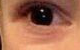

In [44]:
left_eye = (230, 150, 310, 200)
left_eye_image = my_pic.crop(left_eye)
left_eye_image

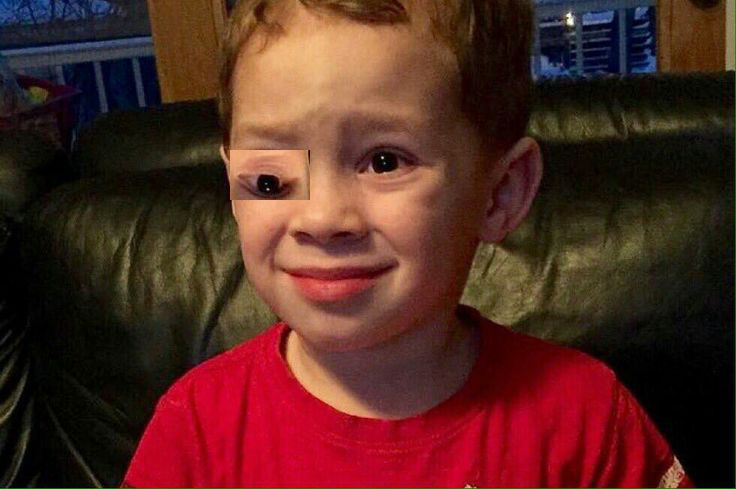

In [47]:
left_eye_image= left_eye_image.transpose(Image.Transpose.ROTATE_180)

my_pic.paste(left_eye_image, left_eye)
my_pic

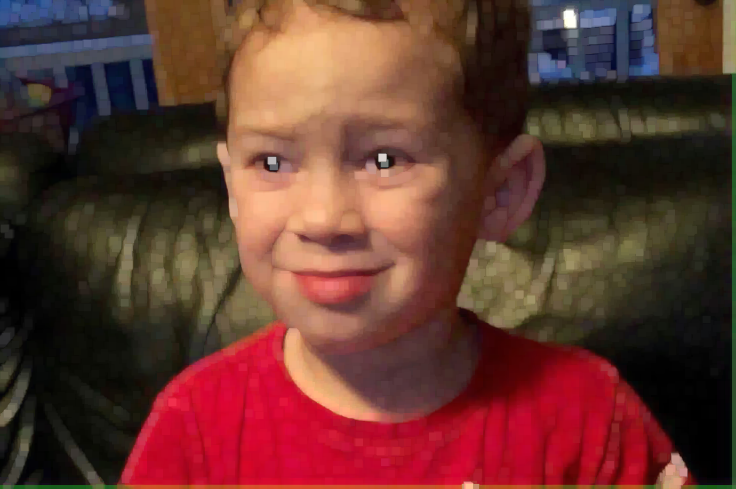

In [60]:
temp = my_pic.filter(ImageFilter.MaxFilter(7))
temp.save("temp.png")
temp

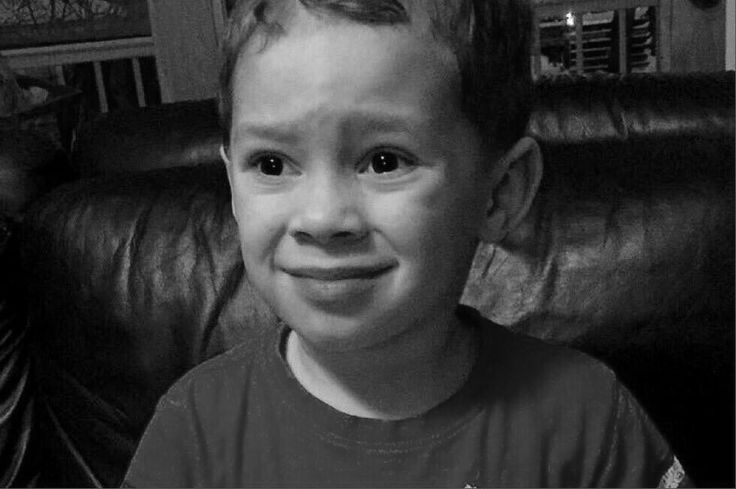

In [64]:
baw = my_pic.convert("L")


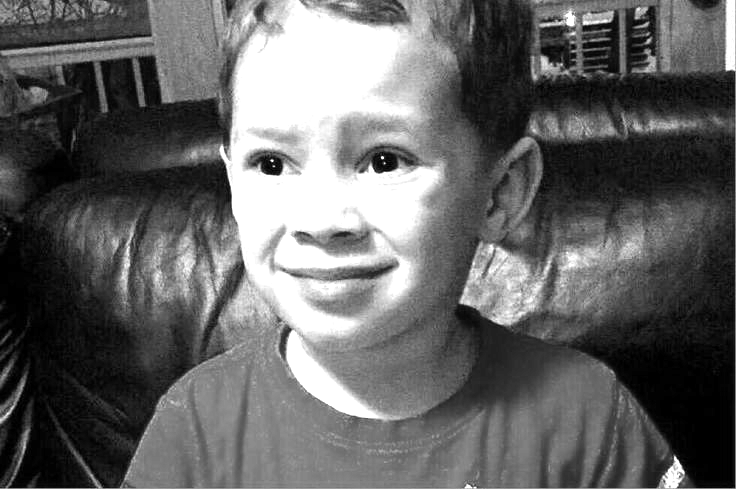

In [81]:
baw.point(lambda i: i*2)

In [63]:
##TODO: Run this later

# import cv2
# img=cv2.imread('Tulips.jpg') # imread() returns a numpy array containing values that represents pixel level data.
# clahe=cv2.createCLAHE() #createCLAHE method to perform adaptive histogram equalization
# gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #cvtColor() method is used to convert an image from one color space to another
# enh_img=clahe.apply(gray_img)
# #cv2.imwrite('enhanced.png',enh_img)
# rgb_image = cv2.cvtColor(enh_img, cv2.COLOR_GRAY2RGB)
# cv2.imwrite('colorenhanced.png',rgb_image)

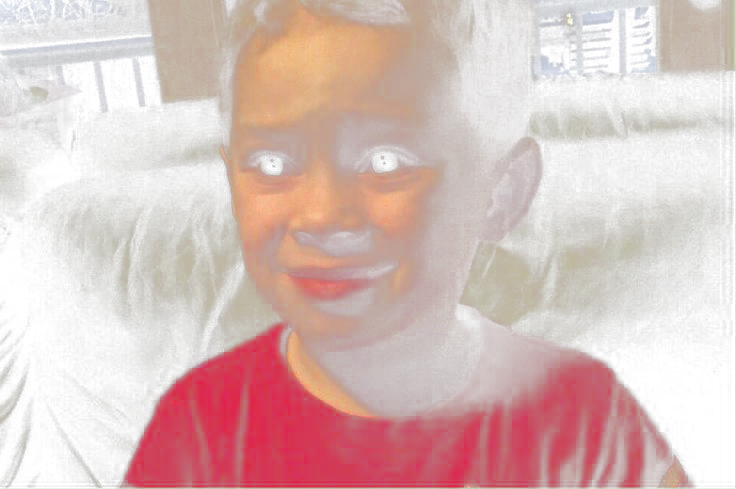

In [80]:
my_pic_enhanced = my_pic.convert("RGBA")

source = my_pic_enhanced.split()

R, G, B, A = 0, 1, 2, 3


# paste the processed band back, but only where red was < 100
source[A].paste(source[R])

# build a new multiband image
temp2 = Image.merge(my_pic_enhanced.mode, source)
temp2.save("temp.png")
temp2

In [68]:
def temporary(value):
    return value * 2

In [70]:
temporary = lambda value: value*2

temporary(5)

10

In [120]:
maze = """
WWWWWEWWWW
WWWOOOWWOW
WWOOWWWOOW
WWWOOOOOWW
WWWWWSWWWW
"""

maze = maze.strip()

In [115]:
row = len(maze.splitlines())
col = len(maze.splitlines()[0])

(row, col)

(5, 10)

In [116]:
size_of_square= 50;

walk = Image.new("L", (size_of_square,size_of_square), 255)
wall = Image.new("L", (size_of_square,size_of_square), 0)

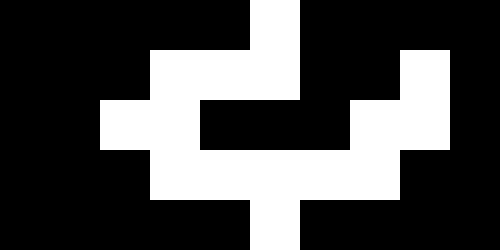

In [117]:
maze_image = Image.new("L", (size_of_square*col, size_of_square*row), 255)

# i,j = (4,2)
# maze_image.paste(wall, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))


for i, line in enumerate(maze.splitlines()):
    for j, letter in enumerate(line.strip()):
        if letter == "W":
            maze_image.paste(wall, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
        else:
            maze_image.paste(walk, (size_of_square*j, size_of_square*i, size_of_square*(j+1), size_of_square*(i+1)))
        # print(f"{i}, {j}, {letter}")
maze_image

In [118]:
maze_image.save("temp.png")

In [123]:
WALL = 0
WALKWAY = 1
START = 2
END = 3
BACKTRACK = 4
WALLOFF = 5
junctions = []

maze_array = np.zeros((row, col))
start_pos = (0,0)
end_pos = (0,0)

for i, line in enumerate(maze.splitlines()):
    for j, let in enumerate(line):
        if (let == "W"):
            maze_array[i][j] = WALL
        if (let == "S"):
            maze_array[i][j] = START
            start_pos= (i,j)
        if (let == "E"):
            maze_array[i][j] = END
            end_pos = (0,0)
        if (let == "O"):
            maze_array[i][j] = WALKWAY
        
        
        # match (let):
        #     case "W": 
        #         maze_array[i][j] = WALL
        #     case "S":
        #         maze_array[i][j] = START
        #     case "E":
        #         maze_array[i][j] = END
        #     case "O":
        #         maze_array[i][j] = WALKWAY
maze_array

array([[0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]])

In [132]:
def left(x,y):
    if y<1:
        return
    return (x, y-1)

def right(x,y):
    if y>=col-1:
        return
    return (x, y+1)

def up(x,y):
    if x<1:
        return
    return (x-1, y)

def down(x,y):
    if x>=row-1:
        return
    return (x+1, y)

def get_legal_directions(x, y, backtrack = False):
    """Gets the legal directions to move from a point on the maze; Considers the 2 cases; when you are backtracking and when you are not.

    Args:
        x (int): the x coordinate
        y (int): the y coordinate
        backtrack (bool, optional): whether you are backtracking or not; checks for walkway if not baacktracking, 
        checks for backtrack otherwise. Defaults to False.

    Returns:
        List[int]: the legal directions you can go:
            0 -> Left,
            1 -> Right
            2 -> Up
            3 -> Down
    """
    ret = []
    check = WALKWAY if not backtrack else BACKTRACK
    # The .all() is so that the none return value behaves properly
    #Left:
    if maze_array[left(x,y)].all() == check:
        ret.append(0)
    #Right
    if maze_array[right(x,y) ].all() == check:
        ret.append(1)
    #Up
    if  maze_array[up(x,y) ].all() == check:
        ret.append(2)
    #Down
    if  maze_array[down(x,y) ].all() == check:
        ret.append(3)
    return ret
    #Everyone lost interest here, so I stopped...
get_legal_directions(start_pos[0], start_pos[1])

[2]

In [129]:
maze_array[None]

array([[[0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]]])

In [9]:
from PIL import Image, ImageFilter
import numpy as np


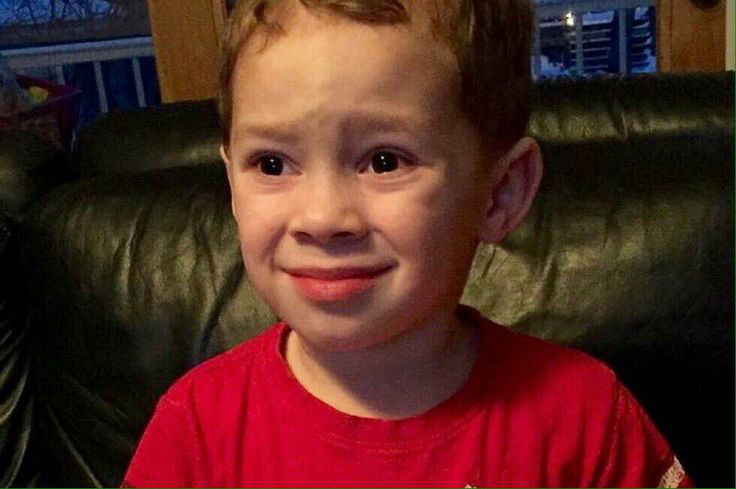

In [23]:
im = Image.open("me.jpg")
im

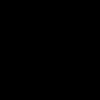

In [30]:
Image.new("L", (100, 100))

In [7]:
box_end= (200,100, 300,200)
region =im.crop(box_end)
region.show()

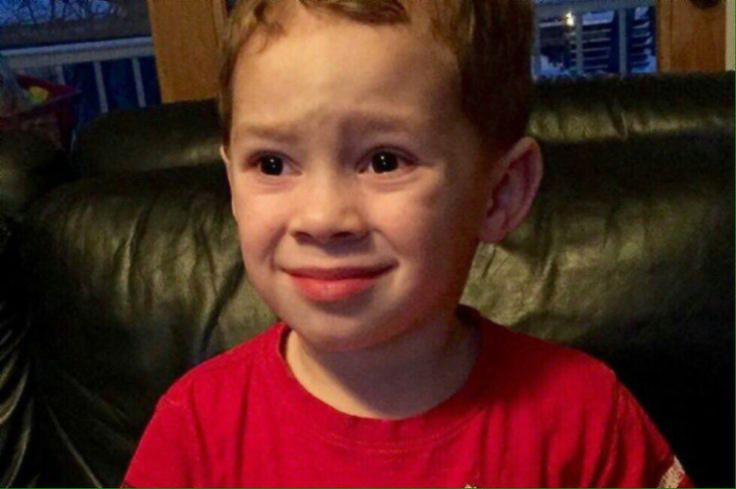

In [15]:
out = im.filter(ImageFilter.SMOOTH_MORE)
out

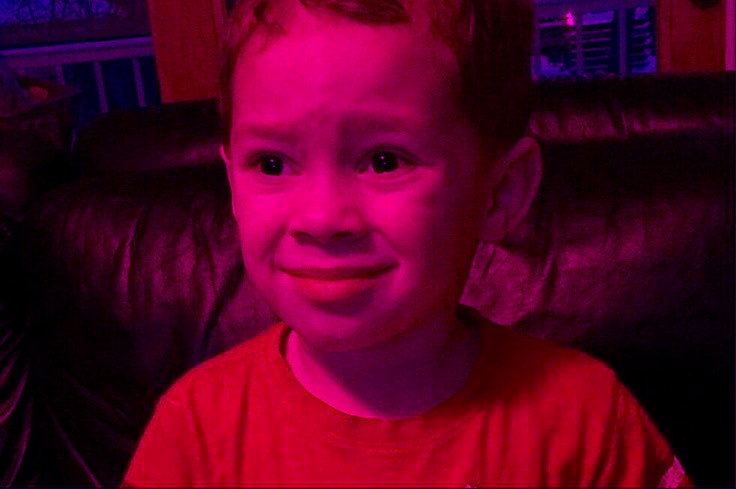

In [26]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

mask = source[G].point(lambda i: 0)

source[G].paste(mask)

# build a new multiband image
change = Image.merge(im.mode, source)
change

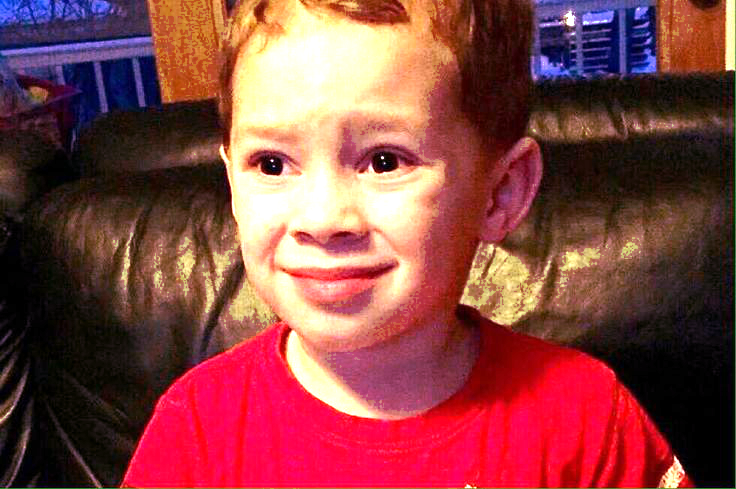

In [19]:
out = im.point(lambda i: i * 2)
out

In [31]:
new_im = im.convert("RGBA")

In [34]:
sources = new_im.split()
A = 3

mask = sources[R].point(lambda x: 255 if x>100 else 0)
sources[A].paste(mask)

change = Image.merge("RGBA", sources)
change.save("temp.png")